# Analysis of data on Irreligion, Human Development and Corruption Perception

Data sources:
- HDI: http://hdr.undp.org/en/composite/HDI
- CPI: https://www.transparency.org/en/cpi/2019/results/table
- Religion importance: https://en.wikipedia.org/wiki/Importance_of_religion_by_country).

In [154]:
import pandas as pd

In [165]:
hdi = pd.read_csv("~/Downloads/2020_HDI.csv")
hdi.sort_values("HDI_2020", ascending=False).head()

,country,HDI_2020
0,Norway,0.957
2,Switzerland,0.955
1,Ireland,0.955
3,"Hong Kong, China (SAR)",0.949
4,Iceland,0.949


In [166]:
hdi.sort_values("HDI_2020", ascending=False).tail()

,country,HDI_2020
184,Burundi,0.433
185,South Sudan,0.433
186,Chad,0.398
187,Central African Republic,0.397
188,Niger,0.394


In [167]:
cpi = pd.read_csv("~/Downloads/CPI_2019.csv")
cpi.sort_values("CPI_2019", ascending=False).head()

,country,CPI_2019
0,Denmark,87
1,New Zealand,87
2,Finland,86
5,Switzerland,85
3,Singapore,85


In [168]:
cpi.sort_values("CPI_2019", ascending=False).tail()

,country,CPI_2019
175,Venezuela,16
176,Yemen,15
177,Syria,13
178,South Sudan,12
179,Somalia,9


In [169]:
reg = pd.read_csv("~/Downloads/irreligiosidade_2009.csv")
reg["country"] = [_.strip().replace("[a]","") for _ in list(reg["country"])]
reg.sort_values("not_important", ascending=False).head()

,country,not_important
0,Estonia,0.86
1,Sweden,0.85
2,Denmark,0.81
4,Norway,0.78
3,Czech Republic,0.75


In [170]:
reg.sort_values("not_important", ascending=False).tail()

,country,not_important
141,Niger,0.0
142,Ethiopia,0.0
143,Somalia,0.0
144,Bangladesh,0.0
145,Oman,0.0


In [158]:
sorted(list(set(list(reg["country"])+list(hdi["country"])+list(hdi["country"]))))

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo (Democratic Republic of the)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Czechia',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini (Kingdom of)',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 '

In [186]:
country_translation = {
    'Bolivia (Plurinational State of)':'Bolivia',
    'Congo (Democratic Republic of the)':'Congo',
    'Democratic Republic of the Congo':'Congo',
    'DR Congo':'Congo',
    'Czechia':'Czech Republic',
    'Hong Kong, China (SAR)':'Hong Kong',
    'Iran (Islamic Republic of)':'Iran',
    "Côte d'Ivoire":'Ivory Coast',
    "Cote d'Ivoire":'Ivory Coast',
    'Eswatini (Kingdom of)':'Eswatini',
    'Guinea-Bissau':'Guinea Bissau',
    'Korea (Republic of)':'South Korea',
    'Korea, South':'South Korea',
    'Korea, North':'North Korea',
    "Lao People's Democratic Republic":'Laos',
    'Moldova (Republic of)':'Moldova',
    'Palestine, State of':'Palestine',
    'Russian Federation':'Russia',
    'Syrian Arab Republic':'Syria',
    'Tanzania (United Republic of)':'Tanzania',
    'United States of America':'United States',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    'Viet Nam':'Vietnam',
}
reg["country_dedup"] = reg["country"].apply(lambda x: country_translation[x] if x in country_translation.keys() else x)
hdi["country_dedup"] = hdi["country"].apply(lambda x: country_translation[x] if x in country_translation.keys() else x)
cpi["country_dedup"] = cpi["country"].apply(lambda x: country_translation[x] if x in country_translation.keys() else x)
hdi

,country,HDI_2020,country_dedup
0,Norway,0.957,Norway
1,Ireland,0.955,Ireland
2,Switzerland,0.955,Switzerland
3,"Hong Kong, China (SAR)",0.949,Hong Kong
4,Iceland,0.949,Iceland
5,Germany,0.947,Germany
6,Sweden,0.945,Sweden
7,Australia,0.944,Australia
8,Netherlands,0.944,Netherlands
9,Denmark,0.940,Denmark


In [187]:
summary = (
    reg[["country_dedup", "not_important"]]
    .merge(hdi[["country_dedup", "HDI_2020"]], on ="country_dedup", how="outer")
    .merge(cpi[["country_dedup", "CPI_2019"]], on ="country_dedup", how="outer")
)
summary

,country_dedup,not_important,HDI_2020,CPI_2019
0,Estonia,0.86,0.892,74.0
1,Sweden,0.85,0.945,85.0
2,Denmark,0.81,0.940,87.0
3,Czech Republic,0.75,0.900,56.0
4,Norway,0.78,0.957,84.0
5,Japan,0.75,0.919,73.0
6,Hong Kong,0.74,0.949,76.0
7,United Kingdom,0.73,0.932,77.0
8,Finland,0.70,0.938,86.0
9,Vietnam,0.69,0.704,37.0


In [188]:
summary[summary.HDI_2020.isnull()]

,country_dedup,not_important,HDI_2020,CPI_2019
29,Taiwan,0.54,NaN,65.0
98,State of Palestine,0.07,NaN,NaN
120,Republic of the Congo,0.05,NaN,NaN
146,Somalia,0.00,NaN,9.0
195,Kosovo,NaN,NaN,36.0
196,North Korea,NaN,NaN,17.0


In [189]:
summary[summary.CPI_2019.isnull()]

,country_dedup,not_important,HDI_2020,CPI_2019
41,Belize,0.33,0.716,NaN
98,State of Palestine,0.07,NaN,NaN
120,Republic of the Congo,0.05,NaN,NaN
150,Liechtenstein,NaN,0.919,NaN
151,Andorra,NaN,0.868,NaN
153,Palau,NaN,0.826,NaN
159,Saint Kitts and Nevis,NaN,0.779,NaN
160,Antigua and Barbuda,NaN,0.778,NaN
163,Fiji,NaN,0.743,NaN
169,Tonga,NaN,0.725,NaN


In [190]:
summary.corr()

,not_important,HDI_2020,CPI_2019
not_important,1.000000,0.696826,0.688470
HDI_2020,0.696826,1.000000,0.760792
CPI_2019,0.688470,0.760792,1.000000


In [ ]:
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

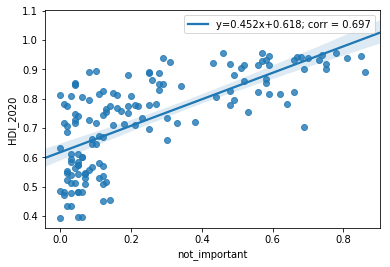

In [227]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    summary[summary.HDI_2020.notnull() & summary.not_important.notnull()]['not_important'],
    summary[summary.HDI_2020.notnull() & summary.not_important.notnull()]['HDI_2020']
)

g = sns.regplot(
    x='not_important',y='HDI_2020',data=summary,
    fit_reg=True,
    line_kws={'label':"y={0:.3f}x+{1:.3f}; corr = {2:.3f}".format(slope,intercept,r_value)}
)
_ = g.legend()

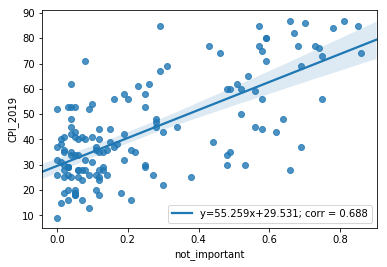

In [226]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    summary[summary.CPI_2019.notnull() & summary.not_important.notnull()]['not_important'],
    summary[summary.CPI_2019.notnull() & summary.not_important.notnull()]['CPI_2019']
)
g = sns.regplot(
    x='not_important',y='CPI_2019',data=summary,
    fit_reg=True,
    line_kws={'label':"y={0:.3f}x+{1:.3f}; corr = {2:.3f}".format(slope,intercept,r_value)}
)
_ = g.legend()